In [23]:
import qiskit as q
%matplotlib inline

In [24]:
circuit = q.QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

In [33]:
# Q 0, 0
circuit.x(0)
# Q 1, 0
circuit.cx(0, 1) # cnot, controlled not, flips second qubit value iff first qubit is a 1
# Q 1, 1
circuit.measure([0, 1], [0, 1])
# C 1, 1

In [9]:
print(circuit.draw())

     ┌───┐     ┌─┐┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘└┬─┬┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫──┤M├─┤ X ├─╫─┤M├
          └───┘ ║  └╥┘ └───┘ ║ └╥┘
c: 2/═══════════╩═══╩════════╩══╩═
                0   1        0  1 


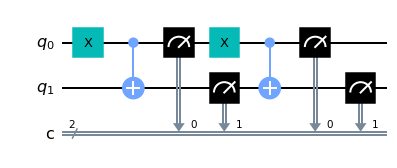

In [11]:
circuit.draw(output='mpl')

In [26]:
from qiskit import IBMQ
from settings.local import get_secret

IBMQ.save_account(token=get_secret('IBM_TOKEN'), overwrite=True)
IBMQ.load_account()

/Users/erwin/.virtualenvs/quantum-computing-tutorial/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-29 19:37:09,964: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
provider = IBMQ.get_provider('ibm-q')

In [28]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print(f'{backend.name()} has {backend.status().pending_jobs} jobs queued and {qubit_count} qubits')

ibmq_qasm_simulator has 50 jobs queued and simulated qubits
ibmqx2 has 469 jobs queued and 5 qubits
ibmq_16_melbourne has 2460 jobs queued and 15 qubits
ibmq_vigo has 1504 jobs queued and 5 qubits
ibmq_ourense has 695 jobs queued and 5 qubits
ibmq_valencia has 241 jobs queued and 5 qubits
ibmq_armonk has 51 jobs queued and 1 qubits
ibmq_athens has 31 jobs queued and 5 qubits
ibmq_santiago has 45 jobs queued and 5 qubits


In [29]:
from qiskit.tools.monitor import job_monitor

# backend = provider.get_backend('ibmq_athens')
backend = provider.get_backend('ibmq_qasm_simulator')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


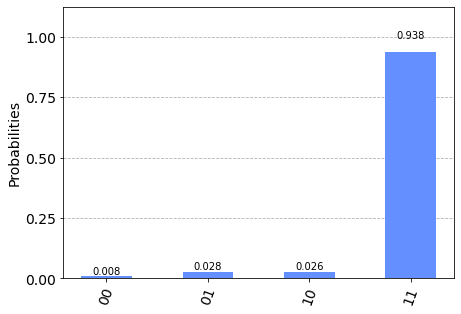

In [31]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [30]:
print(job.error_message())

None


Job Status: job has successfully run


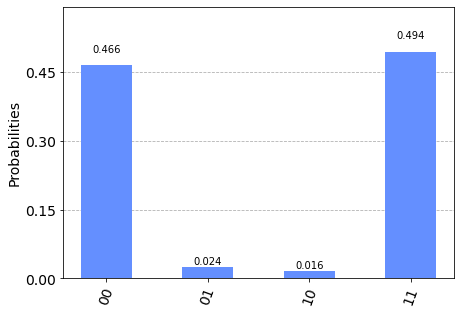

In [36]:
circuit = q.QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits
circuit.h(0)
circuit.cx(0, 1) # cnot, controlled not, flips second qubit value iff first qubit is a 1
circuit.measure([0, 1], [0, 1])

backend = provider.get_backend('ibmq_qasm_simulator')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [37]:
from qiskit import Aer # simulator framework for qiskit
for backend in Aer.backends():
    print(backend)
sim_backend = Aer.get_backend('qasm_simulator')

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator
